In [6]:
import tweepy
import time
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re

In [7]:
#Sacamos los CSV's  
from os import walk
mypath = 'D:\\FACU\\TF_CSVs\\'

filenames = next(walk(mypath), (None, None, []))[2]  


In [8]:
import glob

path = 'D:\\FACU\\TF_CSVs\\' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, delimiter=';')
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

D:\FACU\TF_CSVs\tweets_2021-11-25 19_21.csv
D:\FACU\TF_CSVs\tweets_2021-11-26 18_48.csv
D:\FACU\TF_CSVs\tweets_2021-11-27 16_28.csv
D:\FACU\TF_CSVs\tweets_2021-11-28 19_43.csv


In [9]:
df = pd.concat(li)
df

,Unnamed: 0,tweets,likes,time
0,0,"“La vela es un deporte que puede practicar cualquier persona, no importa la discapacidad” Scott Perry, ex President…",1,2021-11-25 22:17:41+00:00
1,1,"« un lugar entre los olímpicos. No tenía tiempo para aquello ahora mismo, iba a bajar a la tierra, y t…",1,2021-11-25 22:13:59+00:00
2,2,"Todos los encuentros se podrán ver en ESPN por Star+. El plantel argentino cuenta con catorce jugadores, de los cu…",0,2021-11-25 22:10:40+00:00
3,3,está considerando un boicot no oficial a los Juegos Olímpicos de Invierno Pekín 2022,1,2021-11-25 22:03:20+00:00
4,4,"Se nota que no viste los olímpicos, jugo desnudo todo ese torneo",0,2021-11-25 21:57:30+00:00
...,...,...,...,...
1495,1495,⭐️ Curiosidades históricas sobre los Juegos Olímpicos...,0,2021-11-25 22:13:15+00:00
1496,1496,"Todos los encuentros se podrán ver en ESPN por Star+. El plantel argentino cuenta con catorce jugadores, de los cu…",0,2021-11-25 22:10:40+00:00
1497,1497,está considerando un boicot no oficial a los Juegos Olímpicos de Invierno Pekín 2022,1,2021-11-25 22:03:20+00:00
1498,1498,"Se nota que no viste los olímpicos, jugo desnudo todo ese torneo",1,2021-11-25 21:57:30+00:00


In [10]:
#importamos herramientas de pre-procesamiento

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
nlp = spacy.load('en_core_web_lg')

In [9]:
#Realizamos un split de cada tweet.

all_sentences = []

for word in df.tweets:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['“La', 'vela', 'es', 'un', 'deporte', 'que', 'puede', 'practicar', 'cualquier', 'persona,', 'no', 'importa', 'la', 'discapacidad”', 'Scott', 'Perry,', 'ex', 'President…', '«', 'un', 'lugar', 'entre', 'los', 'olímpicos.', 'No', 'tenía', 'tiempo', 'para', 'aquello', 'ahora', 'mismo,', 'iba', 'a', 'bajar', 'a', 'la', 'tierra,', 'y', 't…', 'Todos', 'los', 'encuentros', 'se', 'podrán', 'ver', 'en', 'ESPN', 'por', 'Star+.', 'El', 'plantel', 'argentino', 'cuenta', 'con', 'catorce', 'jugadores,', 'de', 'los', 'cu…', 'está', 'considerando', 'un', 'boicot', 'no', 'oficial', 'a', 'los', 'Juegos', 'Olímpicos', 'de', 'Invierno', 'Pekín', '2022', 'Se', 'nota', 'que', 'no', 'viste', 'los', 'olímpicos,', 'jugo', 'desnudo', 'todo', 'ese', 'torneo', 'No', 'nos', 'hagamos', 'trampas', 'al', 'solitario.', 'La', 'culpa', 'es', 'del', 'jugador.', 'Le', 'ha', 'pasado', 'esto', 'xq', '“', 'le', 'hacia', 'ilusión', '“', 'lo…', 'Rema', 'como', 'loco', 'el', 'gordo,', 'lo', 'llevas', 'a', 'los', 'Juegos', 'Olím

In [10]:
#Removemos puntuaciones.

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [11]:
#Hacemos un stemming de las palabras con NLTK
from nltk.stem.snowball import SnowballStemmer

# Debemos indicarle como parametro el lenguaje para hacer el stemming
s_stemmer = SnowballStemmer(language='spanish')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['la',
 'vel',
 'es',
 'un',
 'deport',
 'que',
 'pued',
 'practic',
 'cualqui',
 'person',
 'no',
 'import',
 'la',
 'discapac',
 'scott',
 'perry',
 'ex',
 'president',
 'un',
 'lug',
 'entre',
 'los',
 'olmpic',
 'no',
 'ten',
 'tiemp',
 'par',
 'aquell',
 'ahor',
 'mism',
 'iba',
 'a',
 'baj',
 'a',
 'la',
 'tierr',
 'y',
 't',
 'tod',
 'los',
 'encuentr',
 'se',
 'podrn',
 'ver',
 'en',
 'espn',
 'por',
 'star',
 'el',
 'plantel',
 'argentin',
 'cuent',
 'con',
 'catorc',
 'jugador',
 'de',
 'los',
 'cu',
 'est',
 'consider',
 'un',
 'boicot',
 'no',
 'oficial',
 'a',
 'los',
 'jueg',
 'olmpic',
 'de',
 'inviern',
 'pekn',
 '2022',
 'se',
 'not',
 'que',
 'no',
 'vist',
 'los',
 'olmpic',
 'jug',
 'desnud',
 'tod',
 'ese',
 'torne',
 'no',
 'nos',
 'hag',
 'tramp',
 'al',
 'solitari',
 'la',
 'culp',
 'es',
 'del',
 'jugador',
 'le',
 'ha',
 'pas',
 'esto',
 'xq',
 'le',
 'haci',
 'ilusin',
 'lo',
 'rem',
 'com',
 'loc',
 'el',
 'gord',
 'lo',
 'llev',
 'a',
 'los',
 'jueg',
 'olm

In [12]:
#Removemos las Stop-words
import re
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:

stem2 = []

for word in lines2:
    word = word.lower() 
    if word not in stopwords.words('spanish'):
        stem2.append(word)

stem2

['vela',
 'deporte',
 'puede',
 'practicar',
 'cualquier',
 'persona',
 'importa',
 'discapacidad',
 'scott',
 'perry',
 'ex',
 'president',
 'lugar',
 'olmpicos',
 'tena',
 'tiempo',
 'aquello',
 'ahora',
 'mismo',
 'iba',
 'bajar',
 'tierra',
 't',
 'encuentros',
 'podrn',
 'ver',
 'espn',
 'star',
 'plantel',
 'argentino',
 'cuenta',
 'catorce',
 'jugadores',
 'cu',
 'est',
 'considerando',
 'boicot',
 'oficial',
 'juegos',
 'olmpicos',
 'invierno',
 'pekn',
 '2022',
 'nota',
 'viste',
 'olmpicos',
 'jugo',
 'desnudo',
 'torneo',
 'hagamos',
 'trampas',
 'solitario',
 'culpa',
 'jugador',
 'pasado',
 'xq',
 'hacia',
 'ilusin',
 'rema',
 'loco',
 'gordo',
 'llevas',
 'juegos',
 'olmpicos',
 'trae',
 'medallas',
 'boxeo',
 'remo',
 'hijo',
 'puta',
 'enfada',
 'ms',
 'afirman',
 'girona',
 'ser',
 'ascenso',
 'hablando',
 'jjoo',
 'afirman',
 'fsa09',
 'neta',
 'vato',
 'seguro',
 'vio',
 'olmpicos',
 '11',
 'ceremonias',
 'inauguracin',
 'ser',
 'atleta',
 'reportera',
 'jcc',
 'jp',

In [14]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [15]:
#Vemos la frecuencia de las palabras

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({2: 1808, 3: 1404, 1: 1142, 4: 334, 5: 273, 6: 248, 7: 133, 8: 114, 9: 106, 10: 71, ...})

In [34]:
#Importamos herramientas para graficar
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
lines

['La',
 'vela',
 'es',
 'un',
 'deporte',
 'que',
 'puede',
 'practicar',
 'cualquier',
 'persona',
 'no',
 'importa',
 'la',
 'discapacidad',
 'Scott',
 'Perry',
 'ex',
 'President',
 '',
 'un',
 'lugar',
 'entre',
 'los',
 'olmpicos',
 'No',
 'tena',
 'tiempo',
 'para',
 'aquello',
 'ahora',
 'mismo',
 'iba',
 'a',
 'bajar',
 'a',
 'la',
 'tierra',
 'y',
 't',
 'Todos',
 'los',
 'encuentros',
 'se',
 'podrn',
 'ver',
 'en',
 'ESPN',
 'por',
 'Star',
 'El',
 'plantel',
 'argentino',
 'cuenta',
 'con',
 'catorce',
 'jugadores',
 'de',
 'los',
 'cu',
 'est',
 'considerando',
 'un',
 'boicot',
 'no',
 'oficial',
 'a',
 'los',
 'Juegos',
 'Olmpicos',
 'de',
 'Invierno',
 'Pekn',
 '2022',
 'Se',
 'nota',
 'que',
 'no',
 'viste',
 'los',
 'olmpicos',
 'jugo',
 'desnudo',
 'todo',
 'ese',
 'torneo',
 'No',
 'nos',
 'hagamos',
 'trampas',
 'al',
 'solitario',
 'La',
 'culpa',
 'es',
 'del',
 'jugador',
 'Le',
 'ha',
 'pasado',
 'esto',
 'xq',
 '',
 'le',
 'hacia',
 'ilusin',
 '',
 'lo',
 'Rem

<function matplotlib.pyplot.show(close=None, block=None)>

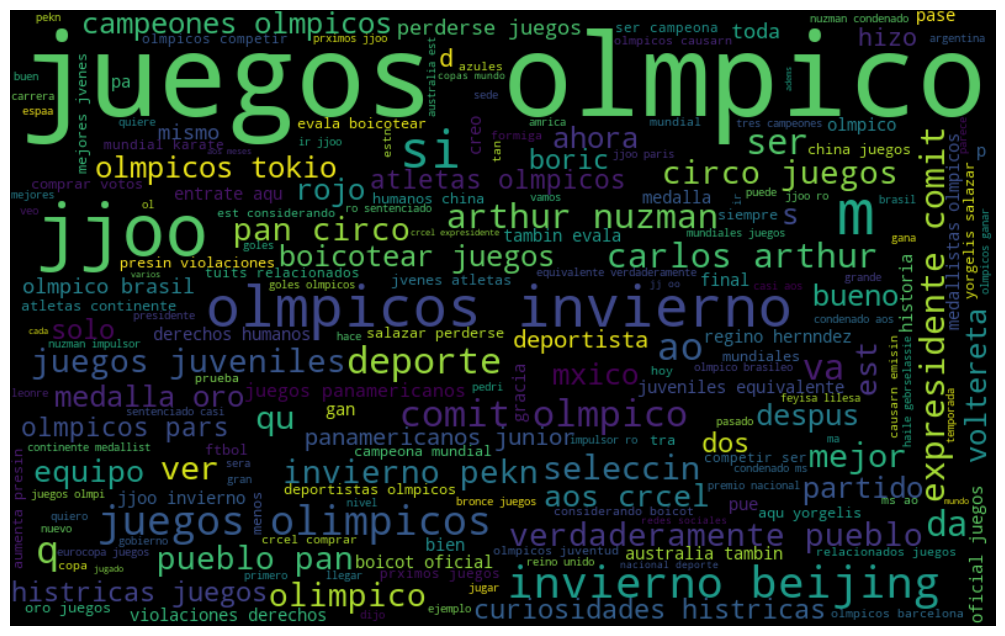

In [38]:
#Visualizar las words frecuentes

all_words = " ".join([sentence for sentence in stem2])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

C:\Users\Cacu\Documents\TF_VENV\TF_Proyect\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


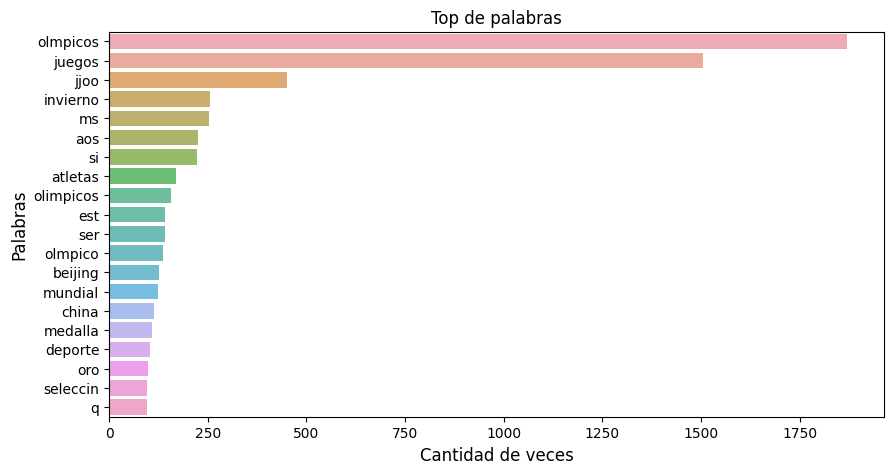

In [36]:
#Grafico que lista las 20 palabras mas utilizadas
#df.plot(20)

df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top de palabras')
plt.ylabel('Palabras', fontsize=12)
plt.xlabel('Cantidad de veces', fontsize=12)
plt.show()

In [ ]:
df.value_counts().plot.bar(figsize=(6, 6))

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [ ]:
str1 = " "

stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

In [ ]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Entidades mencionadas')
plt.ylabel('Palabras en tweet', fontsize=12)
plt.xlabel('Contar palabras', fontsize=12)
plt.show()

In [ ]:
df

In [ ]:
dfTweets

In [ ]:
from textblob import TextBlob

In [ ]:
def get_tweet_sentiment(tweet):
        analysis = TextBlob(tweet)
        language = analysis.detect_language()
        if language == 'en':
            analysis_ready = analysis
        else:
            analysis_ready = analysis.translate(to='en')
            
        if analysis_ready.sentiment.polarity > 0: 
            return 'positive'
        elif analysis_ready.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'